In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [13]:
monthly_profit=pd.read_csv('../dataset/prepared/monthly_profit.csv')
monthly_profit['order_date'] = pd.to_datetime(monthly_profit['order_date'])
monthly_profit['order_date'] = monthly_profit['order_date'].dt.strftime("%b, %Y")

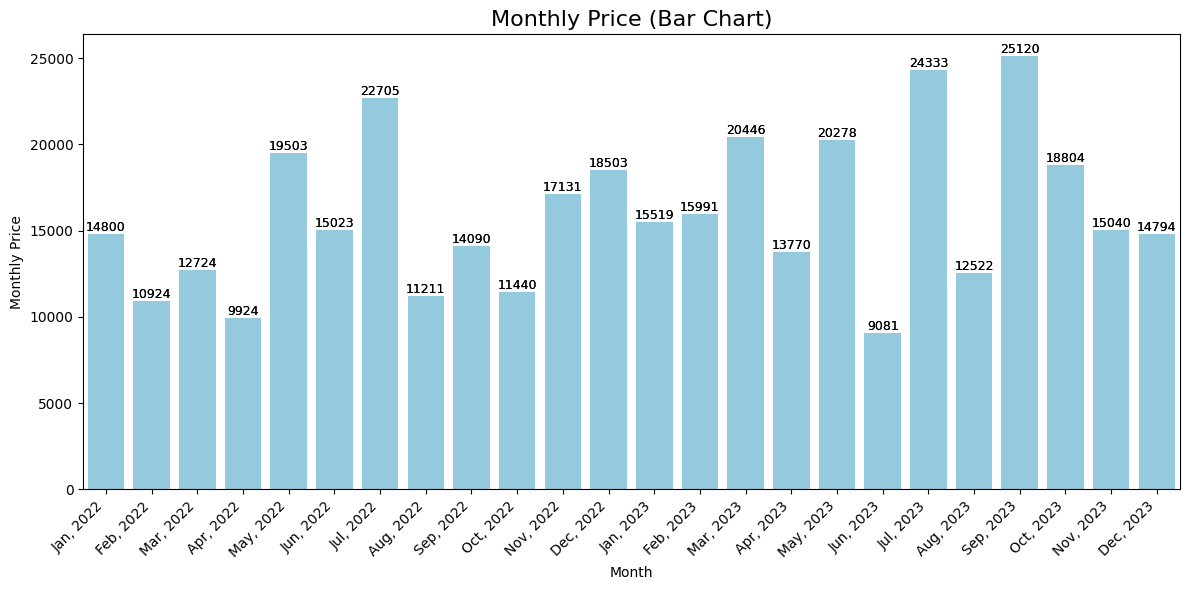

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x="order_date", y="monthly_price", data=monthly_profit, color="skyblue")
ax = sns.barplot(x="order_date", y="monthly_price", data=monthly_profit, color="skyblue")

plt.title("Monthly Price", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Profit")
plt.xticks(rotation=45, ha="right")  
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", fontsize=9)

plt.tight_layout()
plt.show()

In [15]:
profit_category=pd.read_csv('../dataset/prepared/profit_category.csv')

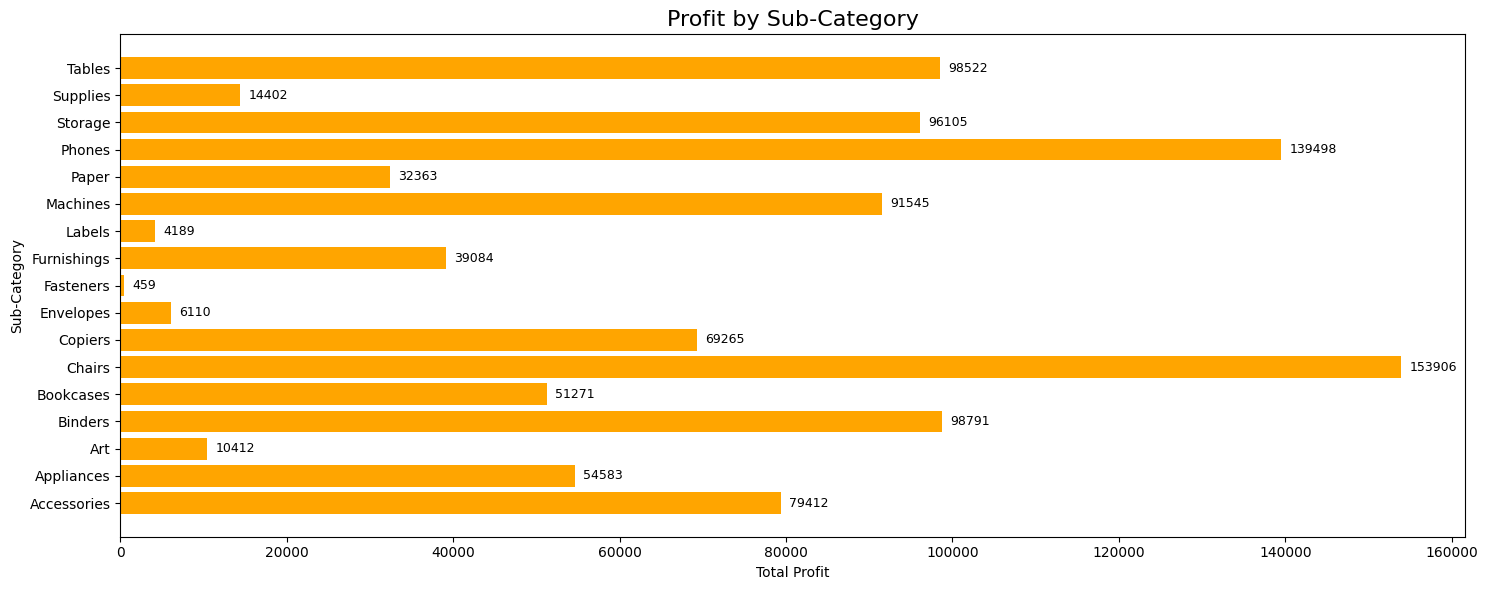

In [25]:
plt.figure(figsize=(15,6))
bars = plt.barh(
    profit_category["sub_category"], 
    profit_category["Total Profit"], 
    color="Orange"
)

plt.title("Profit by Sub-Category", fontsize=16)
plt.xlabel("Total Profit")
plt.ylabel("Sub-Category")
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 1000,                     
        bar.get_y() + bar.get_height()/2,
        f"{width:.0f}",                  
        va="center", fontsize=9
    )
plt.tight_layout()
plt.show()

In [26]:
profit_region=pd.read_csv('../dataset/prepared/profit_region.csv')

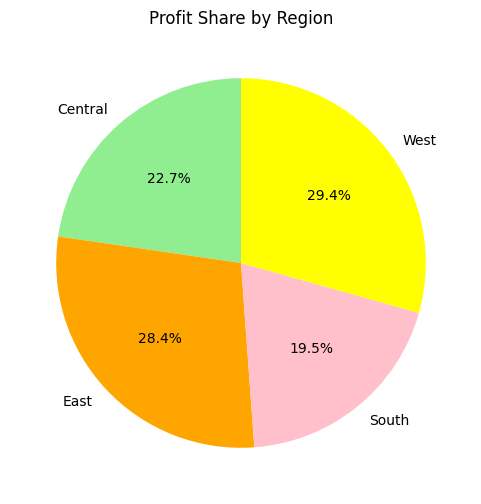

In [37]:
plt.figure(figsize=(6,6))
plt.pie(
    profit_region["Total Profit"], 
    labels=profit_region["region"], 
    autopct="%.1f%%",
     
    colors=["lightgreen","orange","pink","yellow"],
    startangle=90
)

plt.title("Profit Share by Region")
plt.show()

In [38]:
revenue=pd.read_csv('../dataset/prepared/revenue.csv')

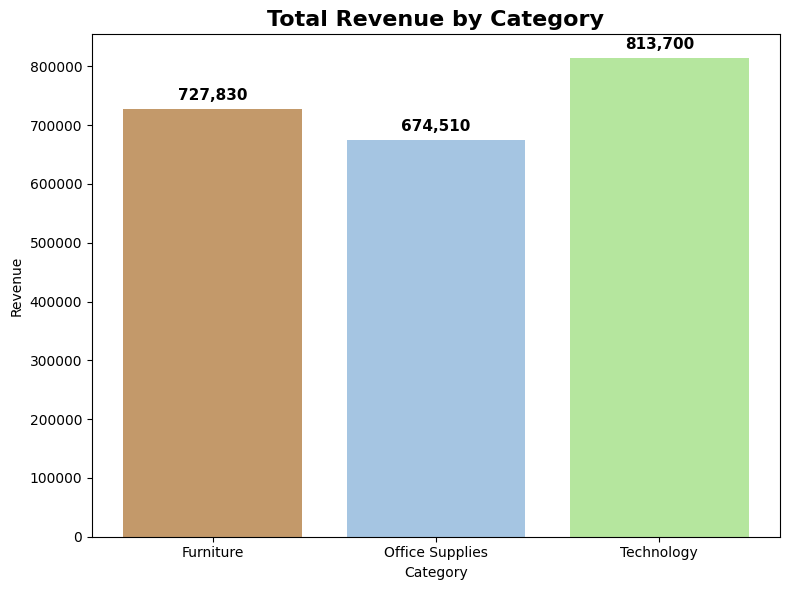

In [41]:
plt.figure(figsize=(8,6))
bars = plt.bar(revenue["category"], revenue["Total Revenue"], color=["#C3996A","#A5C5E2","#B5E69E"])

plt.title("Total Revenue by Category", fontsize=16, weight="bold")
plt.xlabel("Category")
plt.ylabel("Revenue")

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 10000,
        f"{bar.get_height():,}",
        ha="center", va="bottom", fontsize=11, weight="bold"
    )
plt.tight_layout()
plt.show()

In [42]:
shipments=pd.read_csv('../dataset/prepared/shipments_state.csv')

In [51]:
# State name → abbreviation mapping
us_state_abbrev = {
    'Alabama': 'AL','Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR','California': 'CA','Colorado': 'CO',
    'Connecticut': 'CT','Delaware': 'DE','District of Columbia': 'DC','Florida': 'FL','Georgia': 'GA',
    'Hawaii': 'HI','Idaho': 'ID','Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS',
    'Kentucky': 'KY','Louisiana': 'LA','Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA',
    'Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS','Missouri': 'MO','Montana': 'MT',
    'Nebraska': 'NE','Nevada': 'NV','New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM',
    'New York': 'NY','North Carolina': 'NC','North Dakota': 'ND','Ohio': 'OH','Oklahoma': 'OK',
    'Oregon': 'OR','Pennsylvania': 'PA','Rhode Island': 'RI','South Carolina': 'SC','South Dakota': 'SD',
    'Tennessee': 'TN','Texas': 'TX','Utah': 'UT','Vermont': 'VT','Virginia': 'VA','Washington': 'WA',
    'West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY'
}

# Add state codes
shipments["state_code"] = shipments["state"].map(us_state_abbrev)

# Plot choropleth
fig = px.choropleth(
    shipments,
    locations="state_code",
    locationmode="USA-states",
    color="Shipment_Count",
    scope="usa",
    color_continuous_scale="Blues",
    title="Shipments by U.S. State",
    hover_name="state",   # show full state name
    hover_data={"Shipment_Count": True, "state_code": False}  # show shipment count only, hide code
)

fig.show()


In [56]:
fig_bar = px.bar(
    shipments.sort_values("Shipment_Count", ascending=True),
    x="Shipment_Count",
    y="state",
    orientation="h",
    title="Shipment Count by State",
    labels={"state": "State", "Shipment_Count": "Shipments"},
    text="Shipment_Count"
)

fig_bar.update_traces(textposition="outside")

# 🔹 Make the chart bigger
fig_bar.update_layout(
    width=1300,   # adjust width
    height=2000   # adjust height (good for many states)
)

fig_bar.show()

In [57]:
state_profit=pd.read_csv('../dataset/prepared/state_profit.csv')

In [ ]:
top15 = state_profit.sort_values("Total Profit", ascending=False).head(15)

fig = px.bar(
    top15.sort_values("Total Profit", ascending=True),  # ascending for top-to-bottom
    x="Total Profit",
    y="state",
    orientation="h",   # horizontal
    title="Top 15 States by Profit",
    labels={"state": "State", "Total Profit": "Profit"},
    text="Total Profit",
    color="Total Profit",
    color_continuous_scale="Viridis"  
)

fig.update_traces(textposition="outside")

fig.update_layout(
    width=1200,
    height=900
)

fig.show()